<a href="https://colab.research.google.com/github/MulanSchneeberg/Deep-Learning-With-Python/blob/master/A_linear_classfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An end-to-end example: A linear classfier in pure Tensorflow

## 1. Generate the first class of points:1000 random 2D points. cov=[[1,0.5],[0.5,1]] corresponds to an oval-like point cloud oriented from bottom left to top right.

In [1]:
import numpy as np
import tensorflow as tf
number_samples_per_class=1000
negative_samples=np.random.multivariate_normal(mean=[0,3], cov=[[1,0.5],[0.5,1]], size=number_samples_per_class)
negative_samples


array([[ 0.06235388,  3.14696357],
       [ 0.2078856 ,  3.41538291],
       [-0.28260216,  3.76074725],
       ...,
       [-0.04971953,  3.4341906 ],
       [ 1.98147194,  4.31302289],
       [ 1.42519884,  4.21637381]])

## 2. Generate the other class of points with a different mean and the same covariance matrix.

In [2]:
positive_samples=np.random.multivariate_normal(mean=[3,0], cov=[[1,0.5],[0.5,1]], size=number_samples_per_class)

positive_samples

array([[ 3.14057123,  0.65877918],
       [ 3.29985441,  2.21114729],
       [ 2.04200265,  0.43402279],
       ...,
       [ 3.03735018,  0.03316445],
       [ 3.73094483,  0.95899006],
       [ 2.87486515, -0.25465228]])

## 3. In the preceding code, negative_samples and positive_samples are both arrays with shape (1000,2). Let’s stack them into a single array with shape(2000,2).

In [3]:
inputs=np.vstack((negative_samples, positive_samples)).astype(np.float32)

## 4. Let’s generate the corresponding target labels, an array of zeros and ones of shape(2000,1), where targets[i,0]is 0 if inputs[i] belongs to class 0 (and inversely).

In [4]:
target=np.vstack((np.zeros((number_samples_per_class, 1), dtype=np.float32), np.ones((number_samples_per_class, 1), dtype=np.float32)))
target

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

## 5. Plot data with matplotlib

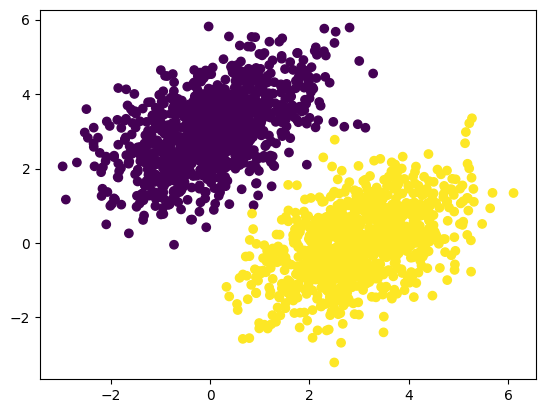

In [5]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=target[:,0])
plt.show()


In [6]:
print(inputs[:, 0])

[ 0.06235388  0.20788561 -0.28260216 ...  3.0373502   3.7309449
  2.874865  ]


In [7]:
print(inputs[:, 1])

[ 3.1469636   3.4153829   3.7607472  ...  0.03316445  0.95899004
 -0.2546523 ]


In [8]:
print(target[:,0])

[0. 0. 0. ... 1. 1. 1.]


## 6. create a linear classifier that can learn to separate these two blobs.
### 6.1 create our variables, W and b, initialized with random values and with zeros,respectively.

In [9]:
input_dim = 2
output_dim = 1
W=tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b=tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

### 6.2 Forward pass function


In [10]:
def model(inputs):
  return tf.matmul(inputs, W) + b

Because our linear classifier operates on 2D inputs, W is really just two scalar coefficients, w1 and w2: W=[[w1],[w2]]. Meanwhile, b is a single scalar coefficient. As such, for a given input point[x,y], its prediction value is
prediction =[[w1],[w2]]•[x,y]+=w1*x+w2*y+b.

###  6.3 Loss function

In [11]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions) # per_sample_losses will be a tensor with the same shape as targets and predictions, containing per-sample loss scores.
  return tf.reduce_mean(per_sample_losses) # We need to average these per-sample loss scores into a single scalar loss value: this is what reduce_mean does.

### 6.4 The traning step function


In [12]:
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
      predictions = model(inputs)
      loss = square_loss(predictions, targets)
      grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
      W.assign_sub(grad_loss_wrt_W * learning_rate)
      b.assign_sub(grad_loss_wrt_b * learning_rate)
      return loss


In [13]:
for step in range(40):
  loss = training_step(inputs, target)
  print(f"Loss at step {step}:{loss:.4f}")

Loss at step 0:2.2888
Loss at step 1:0.4168
Loss at step 2:0.1620
Loss at step 3:0.1207
Loss at step 4:0.1089
Loss at step 5:0.1015
Loss at step 6:0.0951
Loss at step 7:0.0894
Loss at step 8:0.0841
Loss at step 9:0.0793
Loss at step 10:0.0749
Loss at step 11:0.0708
Loss at step 12:0.0671
Loss at step 13:0.0636
Loss at step 14:0.0605
Loss at step 15:0.0576
Loss at step 16:0.0549
Loss at step 17:0.0525
Loss at step 18:0.0503
Loss at step 19:0.0482
Loss at step 20:0.0463
Loss at step 21:0.0446
Loss at step 22:0.0430
Loss at step 23:0.0416
Loss at step 24:0.0402
Loss at step 25:0.0390
Loss at step 26:0.0379
Loss at step 27:0.0368
Loss at step 28:0.0359
Loss at step 29:0.0350
Loss at step 30:0.0342
Loss at step 31:0.0335
Loss at step 32:0.0328
Loss at step 33:0.0322
Loss at step 34:0.0316
Loss at step 35:0.0311
Loss at step 36:0.0306
Loss at step 37:0.0302
Loss at step 38:0.0298
Loss at step 39:0.0294


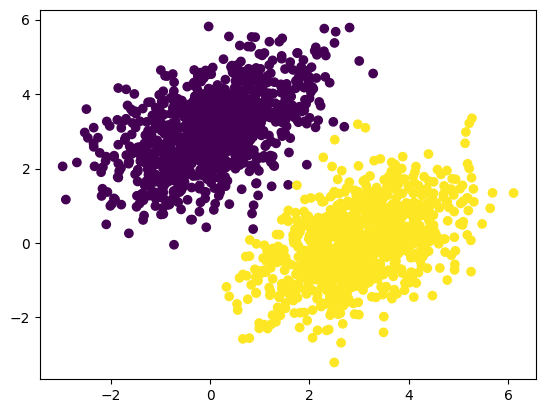

In [14]:
predictions = model(inputs)
plt.scatter(inputs[:, 0],inputs[:,1],c=predictions[:, 0] > 0.5)
plt.show()

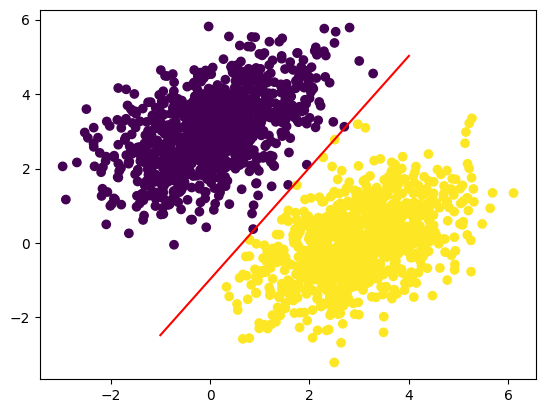

In [15]:
x = np.linspace(-1, 4, 100)
y = - W[0] /W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:,0],inputs[:, 1],c=predictions[:,0] > 0.5)

In [16]:
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.18121237],
       [-0.1207481 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.38200673], dtype=float32)>
